In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import pandas as pd

In [4]:
data = pd.read_csv('datta.csv', header=0, usecols=[0,1,2,4,5,7,8,9])


In [8]:
len(data[data['isFraud'] == 1])/len(data)

0.002800093336444548

In [10]:
ground_truth = np.empty_like(data['isFraud'])

for i in range(len(data['isFraud'])):
    if data.loc[i, 'isFraud'] == 1:
        
        ground_truth[i] = -1
    else: ground_truth[i] = 1

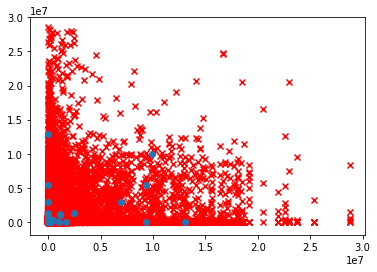

In [16]:
plt.scatter(data.iloc[:,6][data['isFraud']==0], data.iloc[:,3][data['isFraud']==0], marker = 'x', color='r')
plt.scatter(data.iloc[:,6][data['isFraud']==1], data.iloc[:,3][data['isFraud']==1], marker = 'o')

In [29]:
types = {
    'PAYMENT' : 1,
    'TRANSFER' : 2,
    'CASH_OUT' : 3,
    'CASH_IN' : 4,
    'DEBIT' : 5
}

data['type'] = data['type'].apply(lambda x: types[x])


In [30]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [32]:
X = data.iloc[:,:7][data['isFraud'] == 0].values
Y = data.iloc[:,7][data['isFraud'] == 0].values


In [34]:
from sklearn.ensemble import IsolationForest
isol = IsolationForest(n_estimators=100, max_samples=10000, contamination=0.002,
                       max_features=1.0, bootstrap=False, n_jobs=-1, verbose=1)
isol.fit(data.iloc[:,:7][data['isFraud'] == 0])
y = isol.predict(data.iloc[:,:7])
err = (y != ground_truth).sum()
err

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.1s finished


287

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score


In [37]:
y1 = np.empty_like(y)
for i in range(len(y)):
    if y[i] == -1:
        y1[i] = 1
    else: y1[i] = 0
roc_auc_score(data.iloc[:,7], y1)

0.53815672182294272

In [38]:
recall_score(ground_truth, y, pos_label=-1)

0.083333333333333329

In [39]:
precision_score(ground_truth, y, pos_label=-1)

0.032258064516129031

In [41]:
average_precision_score(data.iloc[:,7], y1)

0.059079075037268267

# XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

ImportError: No module named 'xgboost'

In [67]:
seed = 7
test_size = 0.33
X = data.iloc[:,:30]
Y = data.iloc[:,30]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=seed) 

In [70]:
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                      objective='binary:logistic', nthread=-1, seed=seed)
model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=7, silent=False, subsample=1)

In [71]:
ypred = model.predict(testX)
average_precision_score(testY, ypred)

0.87881939447668045